In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets

from sklearn.metrics import confusion_matrix, classification_report

In [56]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [58]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [59]:
df.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [60]:
# Making ? as None
df.drop(df[df['horsepower'] == '?'].index, inplace=True)

In [61]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [62]:
df['horsepower'] = df['horsepower'].astype('float')

In [63]:
df['horsepower'].isnull().any()

False

In [64]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [65]:
le = LabelEncoder()
df['car name'] = le.fit_transform(df['car name'])

In [66]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [67]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,48
1,15.0,8,350.0,165.0,3693,11.5,70,1,35
2,18.0,8,318.0,150.0,3436,11.0,70,1,229
3,16.0,8,304.0,150.0,3433,12.0,70,1,13
4,17.0,8,302.0,140.0,3449,10.5,70,1,159


In [68]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [72]:
X.shape

(392, 8)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
input_shape = [X.shape[1]]
model = keras.Sequential([
    layers.Dense(units=64, activation='relu', input_shape=input_shape),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=1)
])

model.compile(optimizer='RMSprop',loss='mse' ,metrics=['mse','mae'])

In [121]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),
                   callbacks=[tensorflow_docs.modeling.EpochDots(10)])

Epoch 1/100
10/10 [==============================] - 1s 21ms/step - loss: 592.8664 - mse: 592.8664 - mae: 23.0485 - val_loss: 514.8630 - val_mse: 514.8630 - val_mae: 21.5500

Epoch: 0, loss:592.8664,  mae:23.0485,  mse:592.8664,  val_loss:514.8630,  val_mae:21.5500,  val_mse:514.8630,  
.Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 531.9174 - mse: 531.9174 - mae: 21.6677 - val_loss: 453.9713 - val_mse: 453.9713 - val_mae: 20.0828
.Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 467.2469 - mse: 467.2469 - mae: 20.1593 - val_loss: 386.9561 - val_mse: 386.9561 - val_mae: 18.3570
.Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 397.3621 - mse: 397.3621 - mae: 18.3731 - val_loss: 316.2430 - val_mse: 316.2430 - val_mae: 16.3468
.Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 323.6202 - mse: 323.6202 - mae: 16.3237 - val_loss: 245.1060 - val_mse: 245.1060 - val_mae: 14.1514
.Epoch 6/100
10/

.Epoch 47/100
10/10 [==============================] - 0s 4ms/step - loss: 7.1909 - mse: 7.1909 - mae: 1.9316 - val_loss: 6.7981 - val_mse: 6.7981 - val_mae: 1.8205
.Epoch 48/100
10/10 [==============================] - 0s 4ms/step - loss: 7.0483 - mse: 7.0483 - mae: 1.9317 - val_loss: 7.3979 - val_mse: 7.3979 - val_mae: 1.9446
.Epoch 49/100
10/10 [==============================] - 0s 4ms/step - loss: 7.1729 - mse: 7.1729 - mae: 1.9486 - val_loss: 7.0615 - val_mse: 7.0615 - val_mae: 1.8875
.Epoch 50/100
10/10 [==============================] - 0s 4ms/step - loss: 7.0408 - mse: 7.0408 - mae: 1.9193 - val_loss: 6.7483 - val_mse: 6.7483 - val_mae: 1.8327
.Epoch 51/100
10/10 [==============================] - 0s 5ms/step - loss: 7.0294 - mse: 7.0294 - mae: 1.9161 - val_loss: 6.7053 - val_mse: 6.7053 - val_mae: 1.8165

Epoch: 50, loss:7.0294,  mae:1.9161,  mse:7.0294,  val_loss:6.7053,  val_mae:1.8165,  val_mse:6.7053,  
.Epoch 52/100
10/10 [==============================] - 0s 5ms/step - l

10/10 [==============================] - 0s 4ms/step - loss: 6.0471 - mse: 6.0471 - mae: 1.7644 - val_loss: 6.2116 - val_mse: 6.2116 - val_mae: 1.7442
.Epoch 94/100
10/10 [==============================] - 0s 4ms/step - loss: 6.1293 - mse: 6.1293 - mae: 1.8003 - val_loss: 6.3493 - val_mse: 6.3493 - val_mae: 1.7561
.Epoch 95/100
10/10 [==============================] - 0s 4ms/step - loss: 5.8391 - mse: 5.8391 - mae: 1.7527 - val_loss: 6.3096 - val_mse: 6.3096 - val_mae: 1.7376
.Epoch 96/100
10/10 [==============================] - 0s 3ms/step - loss: 6.0434 - mse: 6.0434 - mae: 1.7702 - val_loss: 6.5074 - val_mse: 6.5074 - val_mae: 1.7767
.Epoch 97/100
10/10 [==============================] - 0s 4ms/step - loss: 6.0400 - mse: 6.0400 - mae: 1.7830 - val_loss: 6.5426 - val_mse: 6.5426 - val_mae: 1.7803
.Epoch 98/100
10/10 [==============================] - 0s 4ms/step - loss: 5.8867 - mse: 5.8867 - mae: 1.7528 - val_loss: 6.1736 - val_mse: 6.1736 - val_mae: 1.7228
.Epoch 99/100
10/10 [===

In [122]:
history_df = pd.DataFrame(history.history)

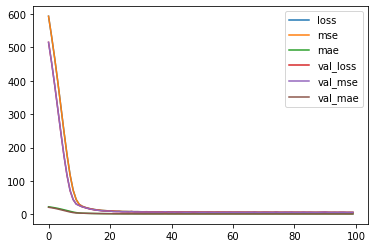

In [123]:
history_df.plot()
plt.show()

In [124]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

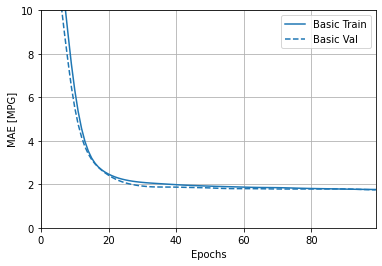

In [125]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history },metric='mae')
plt.ylim([0,10])
plt.ylabel('MAE [MPG]')
plt.show()

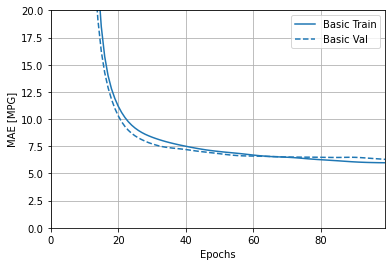

In [127]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history },metric='mse')
plt.ylim([0,20])
plt.ylabel('MAE [MPG]')
plt.show()

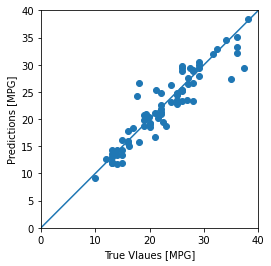

In [132]:
test_prediction = model.predict(X_test).flatten()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_prediction)
plt.xlabel('True Vlaues [MPG]')
plt.ylabel('Predictions [MPG]')
lims= [0, 40]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)